## THIS IS THE SECOND NOTEBOOK FOR THE FINAL PROJECT

In [1]:
import sys
sys.path.insert(0, '/root/')

In [2]:
from tpqoa import tpqoa
import numpy as np
import pandas as pd
import tables as tb
import tstables as tstb
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Pull data from HDF5 file

In [6]:
# we load the AUDUSD data and features created in notebook ONE

In [3]:
h6 = pd.HDFStore('/root/pyalgocourse/final_project/data_features.h5','r')

In [4]:
data = h6['data']

In [5]:
h6.close()

## Split data into train, validate, test

In [6]:
data.head()

,AUDUSD,RSI,MACD,Returns,RSI_lag_1,RSI_lag_2,RSI_lag_3,RSI_lag_4,RSI_lag_5,RSI_lag_6,...,Returns_lag_22,Returns_lag_23,Returns_lag_24,Returns_lag_25,Returns_lag_26,Returns_lag_27,Returns_lag_28,Returns_lag_29,MOM1,MOM2
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 03:00:00,0.78267,60.669419,-0.000039,0.000562,60.094516,59.531142,61.816813,59.812965,62.630244,60.738574,...,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,-0.000064,1.0,0.0
2018-01-02 03:10:00,0.78318,63.690322,-0.000074,0.000651,60.669419,60.094516,59.531142,61.816813,59.812965,62.630244,...,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,1.0,0.0
2018-01-02 03:20:00,0.78318,66.794347,-0.000088,0.000000,63.690322,60.669419,60.094516,59.531142,61.816813,59.812965,...,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,1.0,0.0
2018-01-02 03:30:00,0.78312,66.794347,-0.000085,-0.000077,66.794347,63.690322,60.669419,60.094516,59.531142,61.816813,...,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,1.0,0.0
2018-01-02 03:40:00,0.78336,66.061838,-0.000090,0.000306,66.794347,66.794347,63.690322,60.669419,60.094516,59.531142,...,0.000256,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,1.0,0.0


In [7]:
len(data)

12078

In [8]:
test = data[9600:]

In [9]:
train = data[:7600]


In [10]:
validate = data[7600:9600]

In [11]:
cross_val = data[:9600]

## Backtest

In [12]:
from sklearn import linear_model
from sklearn import svm

In [13]:
# use this to drop some of the lagged returns, drop none, drop = 30, drop all, drop =0 
#drop = 1
#dropped = []
#features = data.columns
#new_features = ['RSI','MACD']

#for feature in new_features:
#    for drope in range(drop+1,29+1):
#        drp = '%s_lag_%d' % (feature, drope)
#        dropped.append(drp)

#cols = data.columns.drop(dropped)
#cols = cols.drop(['AUDUSD','RSI','MACD','Returns'])

old_featdrop = 20
new_featdrop = 1
dropped = []
features = data.columns
old_features = ['Returns']
new_features = ['RSI','MACD']

for feature in new_features:
    for drope in range(new_featdrop + 1, 29 + 1):
        drp = '%s_lag_%d' % (feature, drope)
        dropped.append(drp)

for feat in old_features:
    for dro in range(old_featdrop + 1, 29 + 1):
        drp1 = '%s_lag_%d' % (feat, dro)
        dropped.append(drp1)

cols = data.columns.drop(dropped)
cols = cols.drop(['AUDUSD','RSI','MACD','Returns'])
cols

Index(['RSI_lag_1', 'MACD_lag_1', 'Returns_lag_1', 'Returns_lag_2',
       'Returns_lag_3', 'Returns_lag_4', 'Returns_lag_5', 'Returns_lag_6',
       'Returns_lag_7', 'Returns_lag_8', 'Returns_lag_9', 'Returns_lag_10',
       'Returns_lag_11', 'Returns_lag_12', 'Returns_lag_13', 'Returns_lag_14',
       'Returns_lag_15', 'Returns_lag_16', 'Returns_lag_17', 'Returns_lag_18',
       'Returns_lag_19', 'Returns_lag_20', 'MOM1', 'MOM2'],
      dtype='object')

In [14]:
strat_train = train.copy()
strat_train.head()

,AUDUSD,RSI,MACD,Returns,RSI_lag_1,RSI_lag_2,RSI_lag_3,RSI_lag_4,RSI_lag_5,RSI_lag_6,...,Returns_lag_22,Returns_lag_23,Returns_lag_24,Returns_lag_25,Returns_lag_26,Returns_lag_27,Returns_lag_28,Returns_lag_29,MOM1,MOM2
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 03:00:00,0.78267,60.669419,-0.000039,0.000562,60.094516,59.531142,61.816813,59.812965,62.630244,60.738574,...,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,-0.000064,1.0,0.0
2018-01-02 03:10:00,0.78318,63.690322,-0.000074,0.000651,60.669419,60.094516,59.531142,61.816813,59.812965,62.630244,...,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,1.0,0.0
2018-01-02 03:20:00,0.78318,66.794347,-0.000088,0.000000,63.690322,60.669419,60.094516,59.531142,61.816813,59.812965,...,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,1.0,0.0
2018-01-02 03:30:00,0.78312,66.794347,-0.000085,-0.000077,66.794347,63.690322,60.669419,60.094516,59.531142,61.816813,...,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,1.0,0.0
2018-01-02 03:40:00,0.78336,66.061838,-0.000090,0.000306,66.794347,66.794347,63.690322,60.669419,60.094516,59.531142,...,0.000256,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,1.0,0.0


In [15]:
LinMod = linear_model.LogisticRegression(C=1e6)
# LinMod = svm.SVC(C = 1, probability = True)

In [16]:
LinMod.fit(strat_train[cols], np.sign(strat_train.loc[:,'Returns']))
# LinMod.fit(strat_train[cols],np.sign(strat_train.loc[:,'Returns']))

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [17]:
pred = LinMod.predict(strat_train[cols])

In [18]:
pred

array([-1., -1., -1., ...,  1., -1.,  1.])

In [19]:
strat_train.loc[:,'Position'] = pred

In [20]:
strat_train.loc[:,'Strategy'] = strat_train.loc[:,'Position'] * strat_train.loc[:,'Returns']

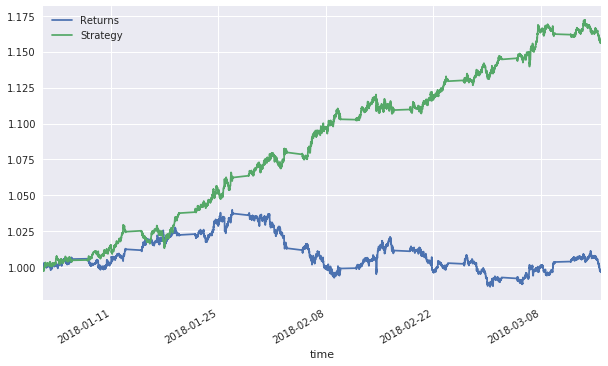

In [21]:
strat_train[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [22]:
mean = strat_train[['Returns','Strategy']].mean() * 6 * 24 * 252
mean

Returns    -0.015774
Strategy    0.695275
dtype: float64

## Run model on validation data

In [23]:
strat_valid = validate.copy()
strat_valid.head()

,AUDUSD,RSI,MACD,Returns,RSI_lag_1,RSI_lag_2,RSI_lag_3,RSI_lag_4,RSI_lag_5,RSI_lag_6,...,Returns_lag_22,Returns_lag_23,Returns_lag_24,Returns_lag_25,Returns_lag_26,Returns_lag_27,Returns_lag_28,Returns_lag_29,MOM1,MOM2
time,,,,,,,,,,,,,,,,,,,,,
2018-03-15 20:40:00,0.77987,31.254785,-0.000073,0.000282,31.472158,34.026471,35.562595,33.298507,35.265318,32.214801,...,-0.000218,0.000090,-0.000128,-0.000960,-0.000038,-0.000333,0.000243,0.000026,0.0,0.0
2018-03-15 20:50:00,0.78002,34.726214,-0.000087,0.000192,31.254785,31.472158,34.026471,35.562595,33.298507,35.265318,...,0.000167,-0.000218,0.000090,-0.000128,-0.000960,-0.000038,-0.000333,0.000243,1.0,0.0
2018-03-15 21:00:00,0.77989,37.003615,-0.000088,-0.000167,34.726214,31.254785,31.472158,34.026471,35.562595,33.298507,...,0.000256,0.000167,-0.000218,0.000090,-0.000128,-0.000960,-0.000038,-0.000333,1.0,0.0
2018-03-15 21:10:00,0.78021,35.864908,-0.000109,0.000410,37.003615,34.726214,31.254785,31.472158,34.026471,35.562595,...,0.000064,0.000256,0.000167,-0.000218,0.000090,-0.000128,-0.000960,-0.000038,0.0,0.0
2018-03-15 21:20:00,0.77993,40.590129,-0.000103,-0.000359,35.864908,37.003615,34.726214,31.254785,31.472158,34.026471,...,0.000231,0.000064,0.000256,0.000167,-0.000218,0.000090,-0.000128,-0.000960,1.0,0.0


In [24]:
pred = LinMod.predict(strat_valid[cols])

In [25]:
strat_valid.loc[:,'Position'] = pred

In [26]:
strat_valid.loc[:,'Strategy'] = strat_valid.loc[:,'Position'] * strat_valid.loc[:,'Returns']

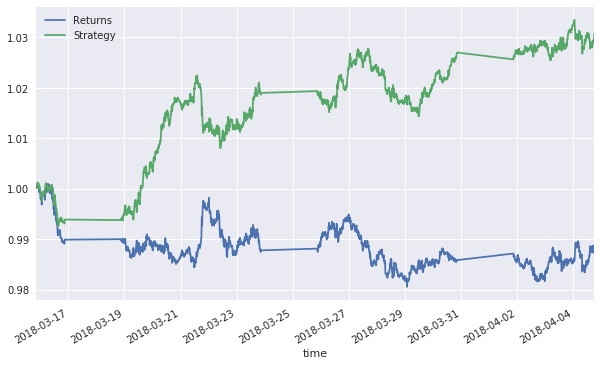

In [27]:
strat_valid[['Returns','Strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [28]:
mean = strat_valid[['Returns','Strategy']].mean() * 6 * 24 * 252
mean

Returns    -0.208547
Strategy    0.549714
dtype: float64

## Cross validate the model using Scikit - learn

In [29]:
strat_crssval = cross_val.copy()
strat_crssval.head()

,AUDUSD,RSI,MACD,Returns,RSI_lag_1,RSI_lag_2,RSI_lag_3,RSI_lag_4,RSI_lag_5,RSI_lag_6,...,Returns_lag_22,Returns_lag_23,Returns_lag_24,Returns_lag_25,Returns_lag_26,Returns_lag_27,Returns_lag_28,Returns_lag_29,MOM1,MOM2
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 03:00:00,0.78267,60.669419,-0.000039,0.000562,60.094516,59.531142,61.816813,59.812965,62.630244,60.738574,...,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,-0.000064,1.0,0.0
2018-01-02 03:10:00,0.78318,63.690322,-0.000074,0.000651,60.669419,60.094516,59.531142,61.816813,59.812965,62.630244,...,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,0.000026,1.0,0.0
2018-01-02 03:20:00,0.78318,66.794347,-0.000088,0.000000,63.690322,60.669419,60.094516,59.531142,61.816813,59.812965,...,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,-0.000192,1.0,0.0
2018-01-02 03:30:00,0.78312,66.794347,-0.000085,-0.000077,66.794347,63.690322,60.669419,60.094516,59.531142,61.816813,...,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,0.000371,1.0,0.0
2018-01-02 03:40:00,0.78336,66.061838,-0.000090,0.000306,66.794347,66.794347,63.690322,60.669419,60.094516,59.531142,...,0.000256,0.000423,-0.000321,-0.000269,-0.000474,-0.000192,-0.001293,0.001075,1.0,0.0


In [30]:
# cross validation: estimating estimator performance

In [31]:
# Learning the parameters of a prediction function and testing it on the same data 
# is a methodological mistake: a model that would just repeat the labels of the 
# samples that it has just seen would have a perfect score but would fail to predict 
# anything useful on yet-unseen data. This situation is called overfitting. To avoid 
# it, it is common practice when performing a (supervised) machine learning experiment 
# to hold out part of the available data as a test set X_test, y_test

In [32]:
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
x_train, x_test, y_train, y_test = train_test_split(strat_crssval[cols], np.sign(strat_crssval.loc[:,'Returns']),
                                  random_state = 0, train_size = 0.5)

# check train data
x_train.shape, y_train.shape
# check test data
x_test.shape, y_test.shape

# fit and evaluate the model on the second set of data
LinMod.fit(x_train, y_train).score(x_test,y_test), LinMod.fit(x_test, y_test).score(x_train, y_train)
#y2_model = LinMod.fit(x2, y2).predict(x1)
#accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)

/root/miniconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(0.5147916666666666, 0.5160416666666666)

In [33]:
# Five fold cross validation

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# here we complete a five fold cross validation, whereby we split the
# data into five groups and use each group to evaluate the model fit 
# other four fifths of the data

In [36]:
scores = cross_val_score(LinMod,strat_crssval[cols], np.sign(strat_crssval.loc[:,'Returns']),cv =5)
scores

array([0.50156087, 0.52264446, 0.51276707, 0.4945284 , 0.5278791 ])

In [37]:
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std()))


Accuracy: 0.512 (+/- 0.01)


## Save model in pickle for later use

In [38]:
import pickle

In [39]:
filename = 'final_model.sav'

In [40]:
pickle.dump(LinMod,open(filename,'wb'))